### Building chatbot with multiple tools using langgraph

### Create a chatbot with tool capabilities with arxiv, wikipedia search and some functions

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [3]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="llama-3.3-70b-versatile")
llm_groq.invoke("hi I am sachchida. I am AI enthusiast")

/home/sachchida/anaconda3/envs/torch-cuda12_8/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content="Hello Sachchida, nice to meet you. It's great to hear that you're an AI enthusiast. Artificial Intelligence is a fascinating field with endless possibilities. What aspects of AI interest you the most? Are you into machine learning, natural language processing, computer vision, or something else? I'm here to chat and learn with you.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 46, 'total_tokens': 115, 'completion_time': 0.191611529, 'prompt_time': 0.002469814, 'queue_time': 0.056263356, 'total_time': 0.194081343}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9e1e8f8435', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--ff583a94-b675-4df6-a965-7565c9a281f8-0', usage_metadata={'input_tokens': 46, 'output_tokens': 69, 'total_tokens': 115})

In [4]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [5]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [6]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [7]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [8]:
wiki.invoke("barack obama")

'Page: Barack Obama\nSummary: Barack Hussein Obama II (born August 4, 1961) is an American politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African American president. Obama previously served as a U.S. senator representing Illinois from 2005 to 2008 and as an Illinois state senator from 1997 to 2004.\nBorn in Honolulu, Hawaii, Obama graduated from Columbia University in 1983 with a Bachelor of Arts degree in polit'

In [9]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily=TavilySearchResults()

/tmp/ipykernel_6462/3543858584.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [10]:
tavily.invoke("provide the current USD to INR conversion rate")

[{'title': 'Indian Rupee - Quote - Chart - Historical Data - News',
  'url': 'https://tradingeconomics.com/india/currency',
  'content': "## The USD/INR exchange rate rose to 88.0070 on October 17, 2025, up 0.02% from the previous session. Over the past month, the Indian Rupee has strengthened 0.23%, but it's down by 4.68% over the last 12 months. Historically, the USDINR reached an all time high of 88.97 in September of 2025. Indian Rupee - data, forecasts, historical chart - was last updated on October 17 of 2025. [...] ### The USD/INR exchange rate rose to 88.0070 on October 17, 2025, up 0.02% from the previous session. Over the past month, the Indian Rupee has strengthened 0.23%, but it's down by 4.68% over the last 12 months. The Indian Rupee is expected to trade at 88.48 by the end of this quarter, according to Trading Economics global macro models and analysts expectations. Looking forward, we estimate it to trade at 87.52 in 12 months time. [...] | Crosses | Price |  |  | Day |

In [11]:
### combine all the tools in the list
tools=[arxiv,wiki,tavily]

In [12]:
### intialize my llm model
from langchain_groq import ChatGroq
llm=ChatGroq(model="openai/gpt-oss-20b")
### bind llm with tools (list of tools)
llm_with_tools=llm.bind_tools(tools)

In [13]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint

In [14]:
llm_with_tools.invoke([HumanMessage(content=f"what is the recent AI news")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'User: "what is the recent AI news". They want recent AI news. We should browse. Use tavily_search_results_json to get recent AI news. Let\'s do that.', 'tool_calls': [{'id': 'fc_509dc93a-bf20-4e80-b715-eab1fe045cae', 'function': {'arguments': '{"query":"recent AI news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 291, 'total_tokens': 357, 'completion_time': 0.066743488, 'prompt_time': 0.017782365, 'queue_time': 0.046936995, 'total_time': 0.084525853}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_3d587a02fb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1db96e68-c3fa-4f74-b8ea-430cfbcbe504-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': 'fc_509dc93a-bf20-4e80-b715-eab1fe045cae', 'type': 'tool_call'}], usage_metadata={'inp

In [15]:
llm_with_tools.invoke([HumanMessage(content=f"what is the recent AI news")]).tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'recent AI news 2025'},
  'id': 'fc_0d49d25d-32d8-43ae-a73a-584a86f94383',
  'type': 'tool_call'}]

In [16]:
### Entire chatbot with langgraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [17]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [18]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [19]:
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"tool_calling_llm")

builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools",END)
graph=builder.compile()

In [20]:
from pprint import pprint, PrettyPrinter

In [21]:
messages=graph.invoke({"messages":HumanMessage(content="what is attention is all you need")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is attention is all you need
================================== Ai Message ==================================

**“Attention Is All You Need”** is a landmark research paper published in 2017 by Vaswani et al. that introduced the *Transformer* architecture, which has since become the foundation of most state‑of‑the‑art models in natural language processing (NLP) and beyond.

---

## 1. Why the paper matters
| Problem with previous seq‑to‑seq models | What the Transformer offers |
|----------------------------------------|-----------------------------|
| Recurrent layers (RNN/LSTM/GRU) must process tokens one by one, limiting parallelism and making training slow | Self‑attention lets every token attend to every other token *in parallel* |
| RNNs struggle with long‑range dependencies and suffer from vanishing/exploding gradients | Multi‑head attention captures both local and global relationships directly

In [22]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_db0b6e10-21f9-4592-86f2-1d55c74ab4fb)
 Call ID: fc_db0b6e10-21f9-4592-86f2-1d55c74ab4fb
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [23]:
messages=graph.invoke({"messages":HumanMessage(content="who is barrack obama")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

who is barrack obama
================================== Ai Message ==================================

Barack Hussein Obama II (born August 4, 1961) is an American politician and attorney who served as the 44th President of the United States from 2009 to 2017. He was the first African‑American to hold the presidency. Prior to his presidency, Obama was a U.S. Senator from Illinois (2005–2008) and a state senator in Illinois (1997–2004). He is a graduate of Columbia University and Harvard Law School, where he was president of the *Harvard Law Review*. After leaving office, he has remained active in public life through the Obama Foundation, various speaking engagements, and the publication of his memoirs.


What is React
It is a generatal Agent Architecture
3 imp steps
1. Act -> Model based on specific input calls specific tool
2. Observe -> Once the tool execute and give the output. it does not end the conversation, instead it passes the tool's output back to the model. 
3. Reason -> After output is back to the model the model will again reason about the output from the tool. based on the output response from the tool the next step model will decide (Smart Agent)

In [24]:
os.environ["LANGSMITH_API_KEY"]=os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="ReAct_Agent"

In [25]:
### Add custom functions
def multiply(a:int, b: int) -> int:
    """Multiply a and b
    Args:
        a: first int
        b: second int
    """
    return a*b
def add(a: int, b:int )-> int:
    """ Adds a and b
        a: first int
        b: second int
    """
    return a+b
def divide(a: int, b:int )-> int:
    """ divide a by b
        a: first int
        b: second int
    """
    return a/b
tools_all= [arxiv,wiki,tavily, add,multiply,divide]

In [26]:
### intialize my llm model
from langchain_groq import ChatGroq
llm_new=ChatGroq(model="openai/gpt-oss-20b")
### bind llm with tools (list of tools)
llm_with_all_tools=llm_new.bind_tools(tools_all)

In [27]:
### Node definition
def tool_calling_llm_all(state:State):
    return {"messages":[llm_with_all_tools.invoke(state["messages"])]}

In [28]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [29]:
builder_new=StateGraph(State)
builder_new.add_node("tool_calling_llm_new",tool_calling_llm_all)
builder_new.add_node("tools",ToolNode(tools_all))
builder_new.add_edge(START,"tool_calling_llm_new")

builder_new.add_conditional_edges(
    "tool_calling_llm_new",
    tools_condition
)
builder_new.add_edge("tools","tool_calling_llm_new")
graph_new=builder_new.compile()

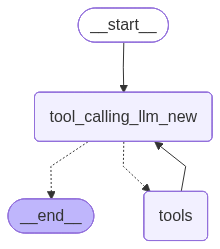

In [30]:
display(Image(graph_new.get_graph().draw_mermaid_png()))

In [31]:
from langchain.schema import HumanMessage

result = graph_new.invoke({
    "messages": [HumanMessage(content="what is attention is all you need")]
})

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is attention is all you need
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_da5ded48-91cd-42e9-ada6-2f5f42dcb496)
 Call ID: fc_da5ded48-91cd-42e9-ada6-2f5f42dcb496
  Args:
    query: Attention Is All You Need arXiv
================================= Tool Message =================================
Name: arxiv

Published: 2022-07-05
Title: Betti numbers of attention graphs is all you really need
Authors: Laida Kushnareva, Dmitri Piontkovski, Irina Piontkovskaya
Summary: We apply methods of topological analysis to the attention graphs, calculated
on the attention heads of the BERT model ( arXiv:1810.04805v2 ). Our research
shows that the classifier built upon basic persistent topological features
(namely, Betti numbers) of the trained neural network can achieve
classification results on par with the con
================================== Ai Message

In [32]:
messages=graph_new.invoke({"messages":HumanMessage(content="1706.03762")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (fc_8942045e-1974-43a8-b17e-7a1dca44c4e5)
 Call ID: fc_8942045e-1974-43a8-b17e-7a1dca44c4e5
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base
================================== Ai Message ==================================

**1706.

In [33]:
messages=graph_new.invoke({"messages":HumanMessage(content="who is barrack obama")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

who is barrack obama
================================== Ai Message ==================================

Barack Obama (born August 4, 1961) is an American politician and attorney who served as the 44th President of the United States from 2009 to 2017. He was the first African‑American to hold the office. Prior to his presidency, Obama was a U.S. Senator from Illinois (2005–2008) and a state senator in Illinois (1997–2004). He is known for major domestic initiatives such as the Affordable Care Act, the Dodd‑Frank Wall Street Reform Act, and the repeal of “Don’t‑Ask, Don’t‑Tell.” Obama has also been active in public life since leaving office, writing books, engaging in public speaking, and founding the Obama Foundation.


In [34]:
messages=graph_new.invoke({"messages":HumanMessage(content="first add two numbers 3 and 4 then multiply by 5 then divide by 10")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

first add two numbers 3 and 4 then multiply by 5 then divide by 10
================================== Ai Message ==================================
Tool Calls:
  add (fc_69cdcdfe-3b22-4140-8f1f-3ae5e68470ed)
 Call ID: fc_69cdcdfe-3b22-4140-8f1f-3ae5e68470ed
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

First, add 3 and 4:  
\(3 + 4 = 7\)

Next, multiply the result by 5:  
\(7 \times 5 = 35\)

Finally, divide by 10:  
\(35 \div 10 = 3.5\)

**Result: 3.5**


### MemorySaver in langgraph

Langgraph can use a checkpointer to automatically save the graph state after each step.

This built-in persistance layer gives us memory, allowing LangGraph to pick up from the last state update.

One of the easisest checkpointers to use is MemorySaver ias in-memory key value store for the graph state.

All we need to do is simply compile the graph with a checkpointer and our graph has memory

![Screenshot from 2025-10-16 23-39-40.png](../screenshots/Screenshot_from_2025-10-16_23-39-40.png)

In [35]:
### Specify the Thread (bottom top approach)

In [36]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [ ]:
builder_new=StateGraph(State)
builder_new.add_node("tool_calling_llm_new",tool_calling_llm_all)
builder_new.add_node("tools",ToolNode(tools_all))
builder_new.add_edge(START,"tool_calling_llm_new")

builder_new.add_conditional_edges(
    "tool_calling_llm_new",
    tools_condition
)
builder_new.add_edge("tools","tool_calling_llm_new")


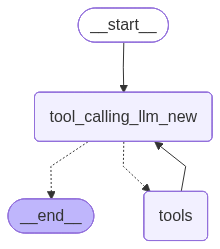

In [38]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
## intialize graph with memory
graph_with_memory=builder_new.compile(checkpointer=memory) 
display(Image(graph_with_memory.get_graph().draw_mermaid_png()))

In [39]:
### how to exeucte with memory
## specify a thread
## Thread id is unique (we can make per user unique thread id)
config={"configurable":{"thread_id":"1"}}
messages=[HumanMessage(content="Add 12 and 13")]
messages=graph_with_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c)
 Call ID: fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

25


In [40]:
### above response is saved into the memory with specific to thread_id
## use same config and ask anothe message
messages=[HumanMessage(content="Add that number to 25")]
messages=graph_with_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c)
 Call ID: fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

25
================================ Human Message =================================

Add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (fc_0ac5e865-993f-45a5-9242-7aa779886193)
 Call ID: fc_0ac5e865-993f-45a5-9242-7aa779886193
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

50


In [42]:
messages=[HumanMessage(content="then multiply that number by 2, and let me know the current temperature of capital city of france")]
messages=graph_with_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c)
 Call ID: fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

25
================================ Human Message =================================

Add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (fc_0ac5e865-993f-45a5-9242-7aa779886193)
 Call ID: fc_0ac5e865-993f-45a5-9242-7aa779886193
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

50
==

In [43]:
messages=[HumanMessage(content="ok now convert that termperature into kelvin")]
messages=graph_with_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13
================================== Ai Message ==================================
Tool Calls:
  add (fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c)
 Call ID: fc_014dbb3e-b12b-472e-8b0c-fdeb5a13297c
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

25
================================ Human Message =================================

Add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (fc_0ac5e865-993f-45a5-9242-7aa779886193)
 Call ID: fc_0ac5e865-993f-45a5-9242-7aa779886193
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

50
==